In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,f1_score,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
diabetes = pd.read_csv('diabetes.csv')

In [3]:
diabetes.Outcome.value_counts() #Outcome ->label 결정값

0    500
1    268
Name: Outcome, dtype: int64

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred_proba)
    print("오차행렬")
    print(confusion)
    print(f"정확도 : {accuracy:.4f}, 정밀도 : {precision:.4f}, 재현율 : {recall:.4f}, F1 : {f1:.4f}, AUC : {auc:.4f}")
    
def precision_recall_curve_plot(y_test, pred_proba):
    precision, recalls, thresholds =  precision_recall_curve(y_test, pred_proba)
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precision[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    # plt.show()
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.legend()
    plt.grid()
    plt.show()

def get_eval_by_threshold(y_test, pred_proba_cl, thresholds):
    from sklearn.preprocessing import Binarizer
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_cl)
        custom_predict = binarizer.transform(pred_proba_cl)
        print('임곗값 :', custom_threshold)
        get_clf_eval(y_test,custom_predict,pred_proba_cl)


오차행렬
[[88 12]
 [23 31]]
정확도 : 0.7727, 정밀도 : 0.7209, 재현율 : 0.5741, F1 : 0.6392, AUC : 0.7919


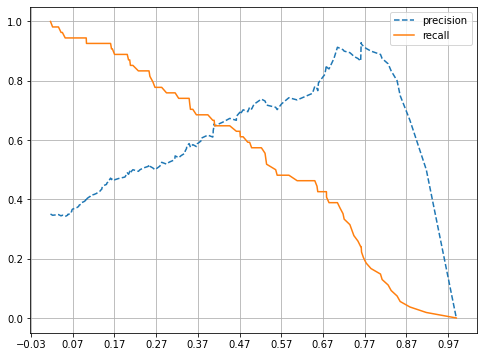

In [6]:
X = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=156,
                                                    stratify=y)
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test,pred,pred_proba)
precision_recall_curve_plot(y_test, pred_proba)

In [7]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

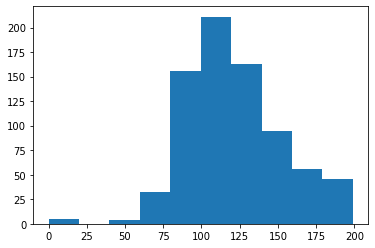

In [8]:
plt.hist(diabetes.Glucose)

In [9]:
zero_features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [10]:
total_count = diabetes.Glucose.count()
for feature in zero_features:
    zero_count = diabetes[diabetes[feature]==0][feature].count()
    print(f'{feature} 0의 건수는 {zero_count}개, 퍼센트 : {zero_count/total_count*100}%')

Glucose 0의 건수는 5개, 퍼센트 : 0.6510416666666667%
BloodPressure 0의 건수는 35개, 퍼센트 : 4.557291666666666%
SkinThickness 0의 건수는 227개, 퍼센트 : 29.557291666666668%
Insulin 0의 건수는 374개, 퍼센트 : 48.69791666666667%
BMI 0의 건수는 11개, 퍼센트 : 1.4322916666666665%


In [11]:
mean_zero_features = diabetes[zero_features].mean()
diabetes[zero_features] = diabetes[zero_features].replace(0,mean_zero_features)

In [12]:
X = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,-1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=156,
                                                    stratify=y)
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test,pred,pred_proba)
# 오차행렬
# [[88 12]
#  [23 31]]
# 정확도 : 0.7727, 정밀도 : 0.7209, 재현율 : 0.5741, F1 : 0.6392, AUC : 0.7919

오차행렬
[[89 11]
 [19 35]]
정확도 : 0.8052, 정밀도 : 0.7609, 재현율 : 0.6481, F1 : 0.7000, AUC : 0.8424


In [13]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.48, 0.5]
get_eval_by_threshold(y_test, pred_proba.reshape(-1,1),thresholds)

임곗값 : 0.3
오차행렬
[[70 30]
 [10 44]]
정확도 : 0.7403, 정밀도 : 0.5946, 재현율 : 0.8148, F1 : 0.6875, AUC : 0.8424
임곗값 : 0.33
오차행렬
[[73 27]
 [14 40]]
정확도 : 0.7338, 정밀도 : 0.5970, 재현율 : 0.7407, F1 : 0.6612, AUC : 0.8424
임곗값 : 0.36
오차행렬
[[77 23]
 [15 39]]
정확도 : 0.7532, 정밀도 : 0.6290, 재현율 : 0.7222, F1 : 0.6724, AUC : 0.8424
임곗값 : 0.39
오차행렬
[[77 23]
 [15 39]]
정확도 : 0.7532, 정밀도 : 0.6290, 재현율 : 0.7222, F1 : 0.6724, AUC : 0.8424
임곗값 : 0.42
오차행렬
[[81 19]
 [16 38]]
정확도 : 0.7727, 정밀도 : 0.6667, 재현율 : 0.7037, F1 : 0.6847, AUC : 0.8424
임곗값 : 0.48
오차행렬
[[88 12]
 [18 36]]
정확도 : 0.8052, 정밀도 : 0.7500, 재현율 : 0.6667, F1 : 0.7059, AUC : 0.8424
임곗값 : 0.5
오차행렬
[[89 11]
 [19 35]]
정확도 : 0.8052, 정밀도 : 0.7609, 재현율 : 0.6481, F1 : 0.7000, AUC : 0.8424


In [14]:
from sklearn.preprocessing import Binarizer

In [15]:
binarizer = Binarizer(threshold=0.48)
pred_th_048 = binarizer.fit_transform(pred_proba.reshape(-1,1))
get_clf_eval(y_test, pred_th_048, pred_proba)

오차행렬
[[88 12]
 [18 36]]
정확도 : 0.8052, 정밀도 : 0.7500, 재현율 : 0.6667, F1 : 0.7059, AUC : 0.8424
